# Week 9 Assignment: Descriptive Statistics and Data Analysis

**Course**: ISM4641 Python for Business Analytics  
**Instructor**: Dr. Smith  
**Due Date**: See Canvas  

---

## Instructions

Complete all questions in this notebook. For each question:
- Write your code in the provided code cells
- Add markdown cells to explain your findings where requested
- Ensure all code runs without errors
- Submit the completed notebook to Canvas

**Total Points**: 100

---

## Setup: Import Libraries and Load Data

Run this cell first to import necessary libraries and generate the dataset for this assignment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate retail store performance data
n_stores = 150

retail_data = pd.DataFrame({
    'Store_ID': [f'ST{i:04d}' for i in range(1, n_stores + 1)],
    'Region': np.random.choice(['North', 'South', 'East', 'West'], n_stores),
    'Monthly_Sales': np.random.normal(65000, 18000, n_stores),
    'Customer_Count': np.random.poisson(600, n_stores),
    'Employee_Count': np.random.randint(5, 25, n_stores),
    'Store_Size_SqFt': np.random.normal(3500, 800, n_stores),
    'Marketing_Spend': np.random.uniform(2000, 15000, n_stores),
    'Customer_Satisfaction': np.random.normal(4.2, 0.6, n_stores)
})

# Add some relationship between variables
retail_data['Monthly_Sales'] = (
    retail_data['Monthly_Sales'] + 
    retail_data['Store_Size_SqFt'] * 8 + 
    retail_data['Marketing_Spend'] * 2
)

# Ensure positive values and realistic ranges
retail_data['Monthly_Sales'] = retail_data['Monthly_Sales'].clip(lower=20000)
retail_data['Customer_Satisfaction'] = retail_data['Customer_Satisfaction'].clip(1, 5)

print("Dataset loaded successfully!")
print(f"\nDataset shape: {retail_data.shape}")
print(f"\nFirst few rows:")
retail_data.head()

Dataset loaded successfully!

Dataset shape: (150, 8)

First few rows:


,Store_ID,Region,Monthly_Sales,Customer_Count,Employee_Count,Store_Size_SqFt,Marketing_Spend,Customer_Satisfaction
0,ST0001,East,126205.173712,601,19,3109.915021,10113.935802,3.932698
1,ST0002,West,118466.290905,618,15,3153.953450,7322.351478,5.000000
2,ST0003,North,110148.734391,615,20,3815.561714,9176.613351,5.000000
3,ST0004,East,94422.395971,585,21,3163.212415,7669.644879,3.886284
4,ST0005,East,79363.909620,624,8,3731.819886,5828.054874,3.947888


---

## Part 1: Measures of Central Tendency (20 points)

### Question 1.1 (10 points)

Calculate the **mean**, **median**, and **mode** for the `Monthly_Sales` column.

- Print each value with appropriate labels
- Format monetary values with dollar signs and comma separators
- In a markdown cell below your code, explain which measure best represents the "typical" monthly sales and why

In [2]:
# Your code here for Question 1.1
mean_sales = retail_data['Monthly_Sales'].mean()
median_sales = retail_data['Monthly_Sales'].median()
mode_sales = retail_data['Monthly_Sales'].mode()

print(f"Mean Sales: ${mean_sales:,.2f}")  # formatting and labeling in one step.
print(f"Median Sales: ${median_sales:,.2f}") 

# There were 149 values that shared the same frequency. I used .head(5) to limit the data to just a small sample, and put it inside a for loop to properly format it since a dataframe is returned.
print("Mode Sales (limited to 5/149): ") 
for mode in mode_sales.head(5): 
    print(f"${mode:,.2f}")

Mean Sales: $112,430.05
Median Sales: $113,702.10
Mode Sales (limited to 5/149): 
$62,754.23
$66,463.20
$67,543.42
$74,246.34
$76,147.21


**Your explanation here:**
(Explain which measure best represents typical sales and why)

Immediately, it was apparent that mode was not going to be the best measure of sales, since there were 149 values that appeared with the same frequency. That leaves me with mean and median, from which I believe that median is the better choice (although they come out to be very close.) In general, using the median is a wiser choice as it represents an exact midpoint, and is unable to be influenced by outliers. We're looking for a value representative of a typical sale, not the average of all sales values.

### Question 1.2 (10 points)

Calculate the mean `Customer_Satisfaction` score for each region.

- Group the data by `Region`
- Calculate the mean satisfaction score for each region
- Sort the results from highest to lowest satisfaction
- In a markdown cell, identify which region has the highest satisfaction and suggest one possible business reason for this

In [3]:
# created a new df where the data is grouped by region, then found the average satisfaction score based on that
retail_by_region = retail_data.groupby('Region')
average_satisfaction = retail_by_region['Customer_Satisfaction'].mean()

# satisfaction scores grouped by region in descending order
print("       Satisfaction Scores")
for region, satisfaction in average_satisfaction.sort_values(ascending = False).items():
    print(f"{region}: {satisfaction:.2f}")

       Satisfaction Scores
West: 4.37
North: 4.31
South: 4.21
East: 4.18


**Your analysis here:**

(Identify highest satisfaction region and suggest a business reason)

The highest satisfaction region is the West. This might just be because of slight variations in the data, as all of the values seem to be relatively close. However, if I had to provide further analysis, a possible explanation is that the west region has a lower sample size, meaning that there aren't as many low satisfaction scores that would likely pop up in a larger sample size.

---

## Part 2: Measures of Variability (25 points)

### Question 2.1 (15 points)

For the `Monthly_Sales` column, calculate:

1. Range (max - min)
2. Variance
3. Standard Deviation
4. Interquartile Range (IQR)
5. Coefficient of Variation (CV)

Print all five measures with clear labels and appropriate formatting.

In [4]:
# Your code here for Question 2.1
sales_range = retail_data['Monthly_Sales'].max() - retail_data['Monthly_Sales'].min() # max - min = range
sales_var = retail_data['Monthly_Sales'].var()
sales_std = retail_data['Monthly_Sales'].std()

sales_q1 = retail_data['Monthly_Sales'].quantile(0.25)
sales_q3 = retail_data['Monthly_Sales'].quantile(0.75)
sales_iqr = sales_q3 - sales_q1 # IQR = q3 - q1

sales_cv = sales_std / mean_sales # coefficient of varation = std / mean

#print(f"${a:,.2f}") 
print(f"Sales Range: ${sales_range:,.2f}") 
print(f"Sales Varation: ${sales_var:,.2f}") 
print(f"Standard Deviation: ${sales_std:,.2f}") 
print(f"Interquartile Range: ${sales_iqr:,.2f}") 
print(f"Sales Coefficient of Variation: ${sales_cv:,.2f}") 

Sales Range: $103,878.56
Sales Varation: $387,607,841.47
Standard Deviation: $19,687.76
Interquartile Range: $24,967.40
Sales Coefficient of Variation: $0.18


### Question 2.2 (10 points)

Using the Empirical Rule (68-95-99.7 rule), calculate the range where approximately 95% of monthly sales values should fall (mean ± 2 standard deviations).

- Calculate the lower and upper bounds
- Count how many stores actually fall within this range
- Calculate the actual percentage
- In a markdown cell, compare the actual percentage to the expected 95% and explain if they match

In [5]:
# Your code here for Question 2.2
lower_bound = mean_sales - 2 * sales_std
upper_bound = mean_sales + 2 * sales_std

range_count = ((retail_data['Monthly_Sales'] >= lower_bound) & (retail_data['Monthly_Sales'] <= upper_bound)).sum()
print(f"Stores that fall in the 95% range: {range_count}")

total_count = retail_data['Monthly_Sales'].shape[0]
print(f"Total count: {total_count}")

range_percent = range_count / total_count
print(f"Percentage of stores that actually fall in the range: {range_percent:.4f}")


Stores that fall in the 95% range: 143
Total count: 150
Percentage of stores that actually fall in the range: 0.9533


**Your comparison here:**

143 / 150 stores fall within the expected range. In fact, its a surpsingly perfect match. The actual percentage is 95.33% which tells us that the data is behaving as expected.

---

## Part 3: Percentiles and Quartiles (15 points)

### Question 3.1 (15 points)

For the `Marketing_Spend` column:

1. Calculate the 10th, 25th, 50th, 75th, and 90th percentiles
2. Identify stores in the bottom 10% (10th percentile or below)
3. Identify stores in the top 10% (90th percentile or above)
4. In a markdown cell, interpret what these percentiles tell you about marketing spending patterns and make a recommendation for the bottom 10% of stores

In [6]:
# Your code here for Question 3.1
spend_10q = retail_data['Marketing_Spend'].quantile(0.10)
spend_25q = retail_data['Marketing_Spend'].quantile(0.25)
spend_50q = retail_data['Marketing_Spend'].quantile(0.50)
spend_75q = retail_data['Marketing_Spend'].quantile(0.75)
spend_90q = retail_data['Marketing_Spend'].quantile(0.90)

print("Bottom 10% stores in terms of marketing spend\n")
bottom_10 = retail_data[retail_data['Marketing_Spend'] <= spend_10q] # find the stores where the marketing spend is in the bottom 10%
print(bottom_10[['Store_ID', 'Region', 'Marketing_Spend', 'Monthly_Sales']]) # then print the most relevant information relating to those stores to identify them
 
print("\nTop 10% stores in terms of marketing spend\n") # repeat the process for the top 10% of stores
top_10 = retail_data[retail_data['Marketing_Spend'] >= spend_90q]
print(top_10[['Store_ID', 'Region', 'Marketing_Spend', 'Monthly_Sales']])

Bottom 10% stores in terms of marketing spend

    Store_ID Region  Marketing_Spend  Monthly_Sales
13    ST0014   East      2292.101008   93970.048308
24    ST0025   West      2239.078795  115908.119429
33    ST0034  South      2142.945773  112654.314812
45    ST0046   West      2610.557568   98538.580051
48    ST0049  South      3076.382683  109951.602624
62    ST0063  North      2405.380756  109488.794385
65    ST0066  South      2668.535575   93767.500670
71    ST0072  South      2976.791163  112065.081442
101   ST0102  South      2512.548548  119303.787148
107   ST0108   West      2441.297722  109657.902694
118   ST0119   West      2481.099251   96594.876049
122   ST0123  South      3000.391621   80331.445938
126   ST0127  South      2849.632430  117111.210629
135   ST0136  North      2317.210160  102583.238354
137   ST0138  North      2276.502341  114821.127290

Top 10% stores in terms of marketing spend

    Store_ID Region  Marketing_Spend  Monthly_Sales
5     ST0006   West     

**Your interpretation and recommendation:**

Stores with a lower marketing spend seem to have a lower monthly sales total compared to thne stores in the top 10% of marketing spend. For the bottom 10%: more income from monthly sales should be reinvested into marketing spend in order to in turn improve sales.

---

## Part 4: Outlier Detection (15 points)

### Question 4.1 (15 points)

Using the IQR method, identify outliers in the `Monthly_Sales` column.

1. Calculate Q1, Q3, and IQR
2. Calculate the lower fence (Q1 - 1.5 × IQR)
3. Calculate the upper fence (Q3 + 1.5 × IQR)
4. Identify all stores that are outliers (below lower fence or above upper fence)
5. Print the Store_ID, Region, and Monthly_Sales for all outlier stores
6. In a markdown cell, analyze whether these outliers represent exceptional performance or problems that need attention

In [7]:
# Your code here for Question 4.1

# 1. Q1, Q3 and IQR already calculated in part 2 I.e: sales_q1 = retail_data['Monthly_Sales'].quantile(0.25) & sales_iqr = sales_q3 - sales_q1

lower_fence = sales_q1 - 1.5 * sales_iqr
upper_fence = sales_q3 + 1.5 * sales_iqr

# Decided to split into two seperate variables in order to easily identify high and low performers easier.
lower_outlier = retail_data[retail_data['Monthly_Sales'] <= lower_fence]
upper_outlier = retail_data[retail_data['Monthly_Sales'] >= upper_fence]

print("Lower Outliers: \n")
print(lower_outlier[['Store_ID', 'Region', 'Marketing_Spend', 'Monthly_Sales']])

print("\nUpper Outliers: \n")
print(upper_outlier[['Store_ID', 'Region', 'Marketing_Spend', 'Monthly_Sales']])


Lower Outliers: 

Empty DataFrame
Columns: [Store_ID, Region, Marketing_Spend, Monthly_Sales]
Index: []

Upper Outliers: 

   Store_ID Region  Marketing_Spend  Monthly_Sales
18   ST0019   West      3811.628963  166632.786211


**Your outlier analysis:**

There is only one extreme outlier in the entire dataset, a store with exceptionally high monthly sales. This means that there are no stores that are majorly underperforming. This means that there aren't any major issues, but there aren't many stores with exceptional performance either. The success of the stores seems to be pretty standardized. 

---

## Part 5: Data Visualization (15 points)

### Question 5.1 (15 points)

Create a comprehensive visualization showing the distribution of `Monthly_Sales` using three plots:

1. A **histogram** with 25 bins
2. A **box plot**
3. A **density plot**

Requirements:
- Display all three plots in a single figure using subplots (1 row, 3 columns)
- Add appropriate titles, labels, and legends
- Add vertical lines for the mean (red, dashed) and median (green, dashed) to the histogram and density plot
- Set the figure size to (18, 5) for better visibility
- In a markdown cell below, describe what each plot reveals about the sales distribution

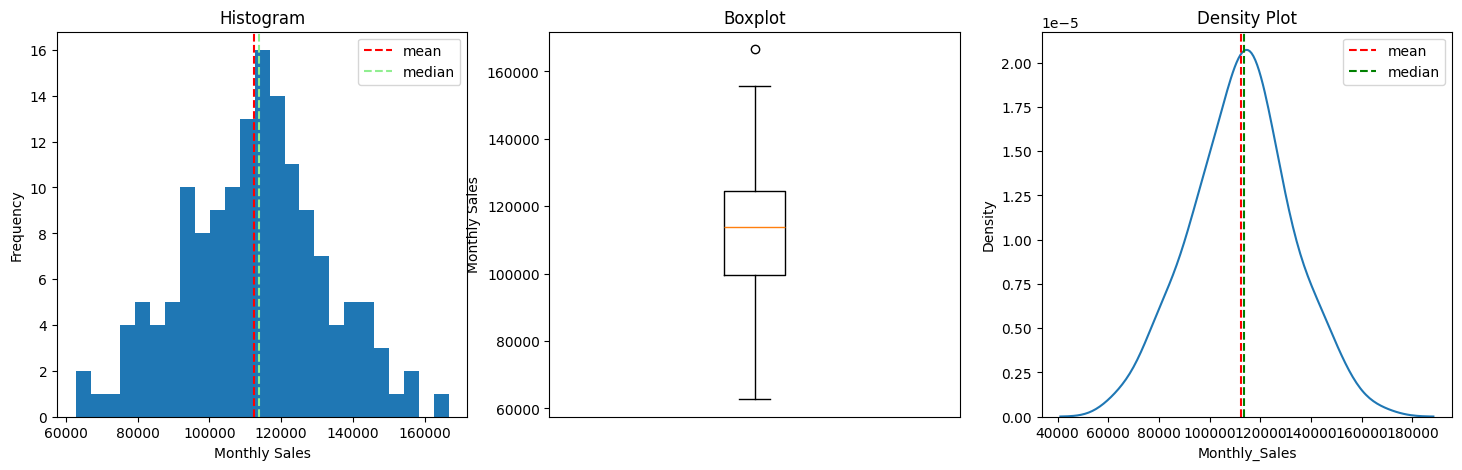

In [8]:
# Your code here for Question 5.1

# creating a subplot with 1 row and 3 columns.
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols= 3, figsize = (18,5))

# histogram with 25 bins, the vertical lines are stylized and labeled so they can be included in the legend.
ax1.hist(retail_data['Monthly_Sales'], 25)
ax1.axvline(mean_sales, color = 'red', linestyle = '--', label = 'mean')
ax1.axvline(median_sales, color = 'lightgreen', linestyle = '--', label = 'median') # used lightgreen as green was a little hard to see
ax1.set_title("Histogram")
ax1.set_xlabel("Monthly Sales")
ax1.set_ylabel("Frequency")
ax1.legend()

ax2.boxplot(retail_data['Monthly_Sales'])
ax2.set_title("Boxplot")
ax2.set_xticks([]) # clear the x ticks so that it doesn't just display "1"
ax2.set_ylabel("Monthly Sales")
#ax2.legend()

# since a density plot is made with seaborn, i used sns.kdeplot and then defined that it is axis 3 on the subplot, otherwise it follows the same formatting as the histogram
sns.kdeplot(retail_data['Monthly_Sales'], ax=ax3)
ax3.axvline(mean_sales, color = 'red', linestyle = '--', label = 'mean')
ax3.axvline(median_sales, color = 'green', linestyle = '--', label = 'median')
ax3.set_title("Density Plot")
ax3.legend()

plt.show()

**Your visualization interpretation:**

The vertical lines help demonstrate just how close the mean and median are. Both are a reliable measure of central tendency in this case as there are no extreme outliers as is seen in the earlier parts of this project, and the data follows a normal distribution which can be seen in all of the plots above. The one extreme outlier can be seen on the boxplot above the 75th percentile, as well as at the far end of the histogram. The histogram reflects small variations in data the best while still demonstration that the data follows a normal distribution.

---

## Part 6: Correlation Analysis (10 points)

### Question 6.1 (10 points)

Analyze the relationships between numerical variables:

1. Create a correlation matrix for all numerical columns (excluding Store_ID)
2. Create a heatmap visualization of the correlation matrix
   - Use `annot=True` to show correlation values
   - Use `cmap='coolwarm'` for the color scheme
   - Set `center=0` and `vmin=-1, vmax=1`
3. In a markdown cell, identify the two variables with the strongest positive correlation and explain what this means for business decision-making

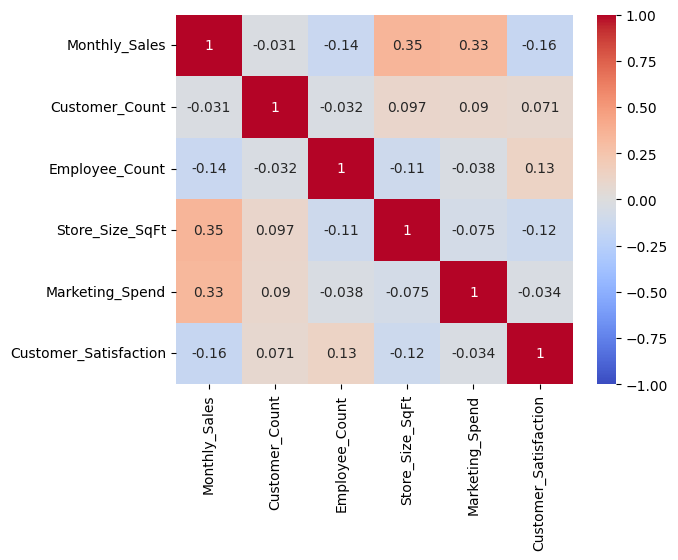

In [12]:
# create correlation matrix and drop columns that are non-numeric
matrix = retail_data.drop(columns=['Store_ID', 'Region']).corr()  

heatmap = sns.heatmap(matrix, annot = True, cmap = 'coolwarm', center = 0, vmin = -1, vmax = 1)
plt.show()

**Your correlation analysis:**

The strongest correlation (aside from the variables that correlate with themselves) can be found between marketing spend and monthly sales, as well as store size and monthly sales. These values being correlated makes a lot of sense. Spending more on marketing brings in a wider customer base. Stores that can afford to have a larger size likely means that they are in a prime location for business, which brings in more sales as well.

Interestingly, the store size seems to negatively correlate with marketing spend, which I believe is a potential area for improvement. Investing in marketing is incredibly important for growth, even for stores that are already doing successfuly in terms of sales.